In [1]:
# !pip install scikit-learn
# !pip install pandas
# !pip install emoji
# !pip install num2words
# !pip install nltk
# !pip install matplotlib
# !pip install wordcloud
# !pip install ipynb 
# !pip install seaborn

In [2]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import emoji
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
# nltk.download('stopwords')
# nltk.download('wordnet')
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from matplotlib import colors
import pandas as pd
from ipynb.fs.full.preprocessor_class import Preprocessor
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andreea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Andreea\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
train_data = pd.read_csv('data/shuffled_train_data.csv',index_col=None)
train_labels = pd.read_csv('data/shuffled_train_labels.csv',index_col=None)

test_data = pd.read_csv('data/test_data.csv',index_col=None)
test_labels = pd.read_csv('data/test_labels.csv',index_col=None)

train_data_plot = pd.read_csv('data/train_data_plot.csv',index_col=None)
test_data_plot = pd.read_csv('data/test_data_plot.csv',index_col=None)

train_data.shape

(45000, 1)

In [3]:
preprocessor = Preprocessor(set(stopwords.words('english')), WordNetLemmatizer(), PorterStemmer(), True, True, True, True, True, False, True, True, True, False)

preprocessed_data = pd.DataFrame(columns=['text'])

preprocessed_data_train = pd.DataFrame(columns=['text'])
preprocessed_data_test = pd.DataFrame(columns=['text'])

preprocessed_data_train['text'] = train_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

preprocessed_data_test['text'] = test_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)

In [4]:
preprocessed_data_test['text'] = preprocessed_data_test['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_data_test

,text
0,freya past particular style fit move wire poke...
1,hated bag sold buffalo exchange almost paid an...
2,look picture fitted waist empire waist dress w...
3,time year great bargain online amazon probably...
4,uhhhh guy anyone kd sell pair riding glass nig...
...,...
5995,comfortable maybe loose stretch overall think ...
5996,love jean denim heavy thin stretchy cling righ...
5997,quality supper work u bought hubby travel alot...
5998,great chain perfect length inch looked lot cho...


In [5]:
preprocessed_data_train['text'] = preprocessed_data_train['text'].apply(lambda x: ' '.join(map(str, x)))
preprocessed_data_train

,text
0,ordered small gift co worker fine price much h...
1,crocs best strap bit tight back shoe high rub ...
2,light warm look better person website great value
3,wish overestimate ring size ordered big used p...
4,far best trail shoe huge merrell fan hiking bo...
...,...
44995,usually love keen pair durable velcro closure ...
44996,left side shoe got burst sure sad thing wore time
44997,love purse reminds hippie day wide enough wall...
44998,returned scarf horrible green color long enoug...


In [7]:
vocab = 0
# best_vocab = 0
ij = 0
# best_ij = 0
# best_kernel = 0
# best_gamma = 0
# best_c = 0
max_accuracy = 0
best_model = 0
best_tfidf = 0

for vocab in [5000]:
    for ij in range(1,4):
        for criterion in ['gini', 'entropy', 'log_loss']:
            for estimator in [150, 200, 300]:
                    tfidf_vectorizer = TfidfVectorizer(max_features=vocab, ngram_range=(1,ij))
                    train_tfidf = tfidf_vectorizer.fit_transform(preprocessed_data_train['text']) 
                    test_tfidf = tfidf_vectorizer.transform(preprocessed_data_test['text']) 
                    
                    model = RandomForestClassifier(n_estimators = estimator, criterion=criterion)
                    
                    print("\n", tfidf_vectorizer)
                    print(model)
                    
                    model.fit(train_tfidf, train_labels['label'])
                    predictii = model.predict(test_tfidf)
                    accuracy = metrics.accuracy_score(test_labels['label'], predictii)
                    
                    if accuracy > max_accuracy:
                        best_model = model
                        best_tfidf = tfidf_vectorizer
                        # best_vocab = vocab
                        # best_ij = ij
                        # best_kernel = kernel
                        # best_gamma = gamma
                        # best_c = c
                        max_accuracy = accuracy
                        
                    print(classification_report(test_labels['label'], predictii))
                    print("accuracy:", accuracy)

print("\nBEST SCORE")
print(best_tfidf)
print(best_model)
# print(classification_report(test_labels['label'], predictii))
print("accuracy:", max_accuracy)


 TfidfVectorizer(max_features=5000)
RandomForestClassifier(n_estimators=150)
              precision    recall  f1-score   support

    negative       0.65      0.82      0.73      2250
     neutral       0.52      0.20      0.29      1500
    positive       0.72      0.84      0.77      2250

    accuracy                           0.67      6000
   macro avg       0.63      0.62      0.60      6000
weighted avg       0.65      0.67      0.63      6000

accuracy: 0.6696666666666666

 TfidfVectorizer(max_features=5000)
RandomForestClassifier(n_estimators=200)
              precision    recall  f1-score   support

    negative       0.65      0.81      0.72      2250
     neutral       0.52      0.19      0.28      1500
    positive       0.72      0.83      0.77      2250

    accuracy                           0.66      6000
   macro avg       0.63      0.61      0.59      6000
weighted avg       0.64      0.66      0.63      6000

accuracy: 0.6648333333333334

 TfidfVectorizer(max_fe

In [7]:
tfidf_vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
train_tfidf = tfidf_vectorizer.fit_transform(preprocessed_data_train['text']) 
test_tfidf = tfidf_vectorizer.transform(preprocessed_data_test['text']) 

model = RandomForestClassifier()

model.fit(train_tfidf, train_labels['label'])
predictii = model.predict(test_tfidf)

In [8]:
print(classification_report(test_labels['label'], predictii))

              precision    recall  f1-score   support

    negative       0.66      0.80      0.72      2250
     neutral       0.53      0.23      0.32      1500
    positive       0.72      0.83      0.77      2250

    accuracy                           0.67      6000
   macro avg       0.63      0.62      0.61      6000
weighted avg       0.65      0.67      0.64      6000


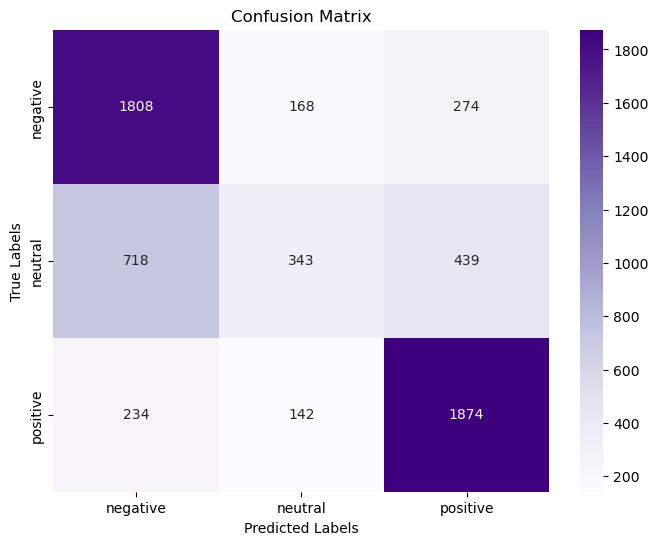

In [9]:
conf_matrix = confusion_matrix(test_labels['label'], predictii)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples', xticklabels = ['negative', 'neutral', 'positive'], yticklabels = ['negative', 'neutral', 'positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

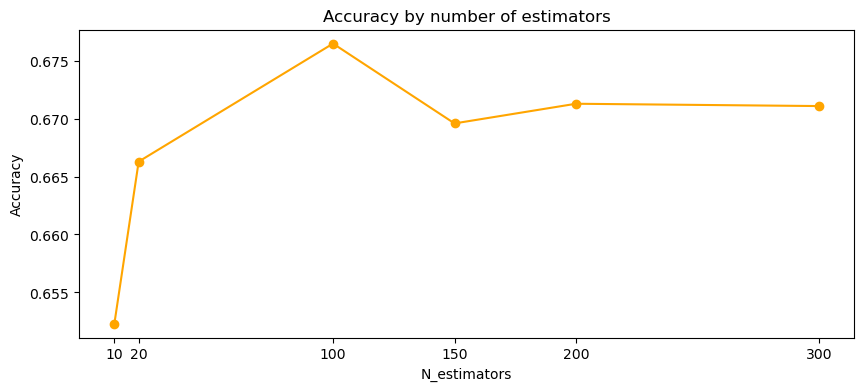

In [3]:
#plot the acc by number of estimators/criterion
values = [0.6523, 0.6663, 0.6765, 0.6696, 0.6713, 0.6711]
estimators = [10, 20, 100, 150, 200, 300]
plt.figure(figsize = (10, 4))
plt.plot(estimators, values, marker = 'o', linestyle = '-', color = 'orange')
plt.xlabel('N_estimators')
plt.ylabel('Accuracy')
plt.title('Accuracy by number of estimators')
plt.xticks(estimators)
plt.show()

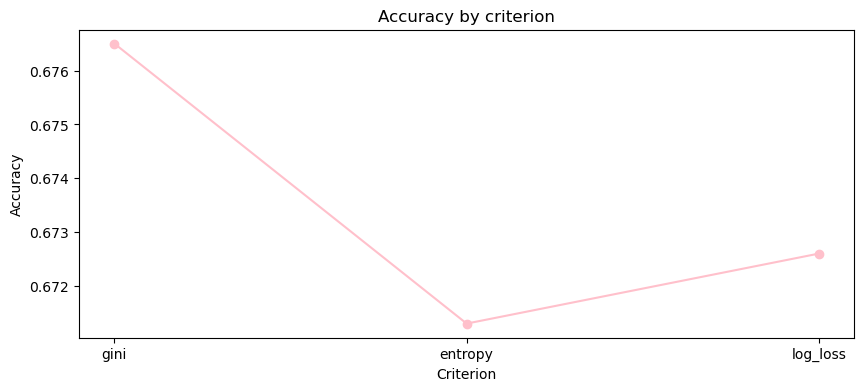

In [4]:
values = [0.6765, 0.6713, 0.6726]
criterion = ["gini", "entropy", "log_loss"]
plt.figure(figsize = (10, 4))
plt.plot(criterion, values, marker = 'o', linestyle = '-', color = 'pink')
plt.xlabel('Criterion')
plt.ylabel('Accuracy')
plt.title('Accuracy by criterion')
plt.show()